## Project name:BREAST CANCER CLASSIFICATION


## Developed by: Jyoti Shinde

## Submitted to:Cognorise infotech

### Problem Statement:Classify breast cancer tumors as malignant or benign

### Dataset:https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

#### Let's begin!

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read Dataset
df = pd.read_csv('data.csv')


### Data explorasion

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Top 5 rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# shape of dataset
df.shape

(569, 33)

In [6]:
#some statistics of data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
# Count of null value in each column
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
# Data type of each column
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
#Column Id is not relevent our machine learnig problem
#Last column Unnamed: 32 is full of NaN values
#Column diagnosis is our target variable((M = malignant, B = benign))

In [10]:
# Dropping unnecessary columns
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

### Data visualisation

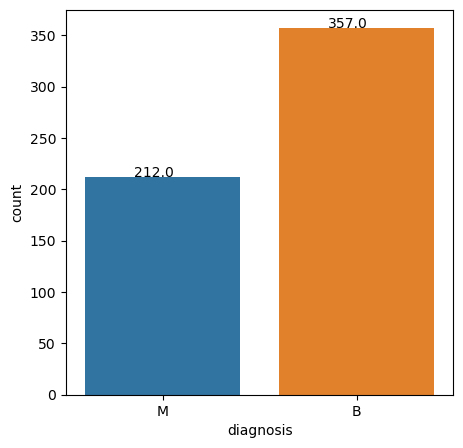

In [11]:
plt.figure(figsize = (5, 5))
ax = sns.countplot(x = df['diagnosis'])
for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

plt.savefig('count_plot.jpg')
plt.show()
     

In [12]:
# Selecting only numerical features
num_ = df.select_dtypes(include = ['float64', 'int64']).columns
num_

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

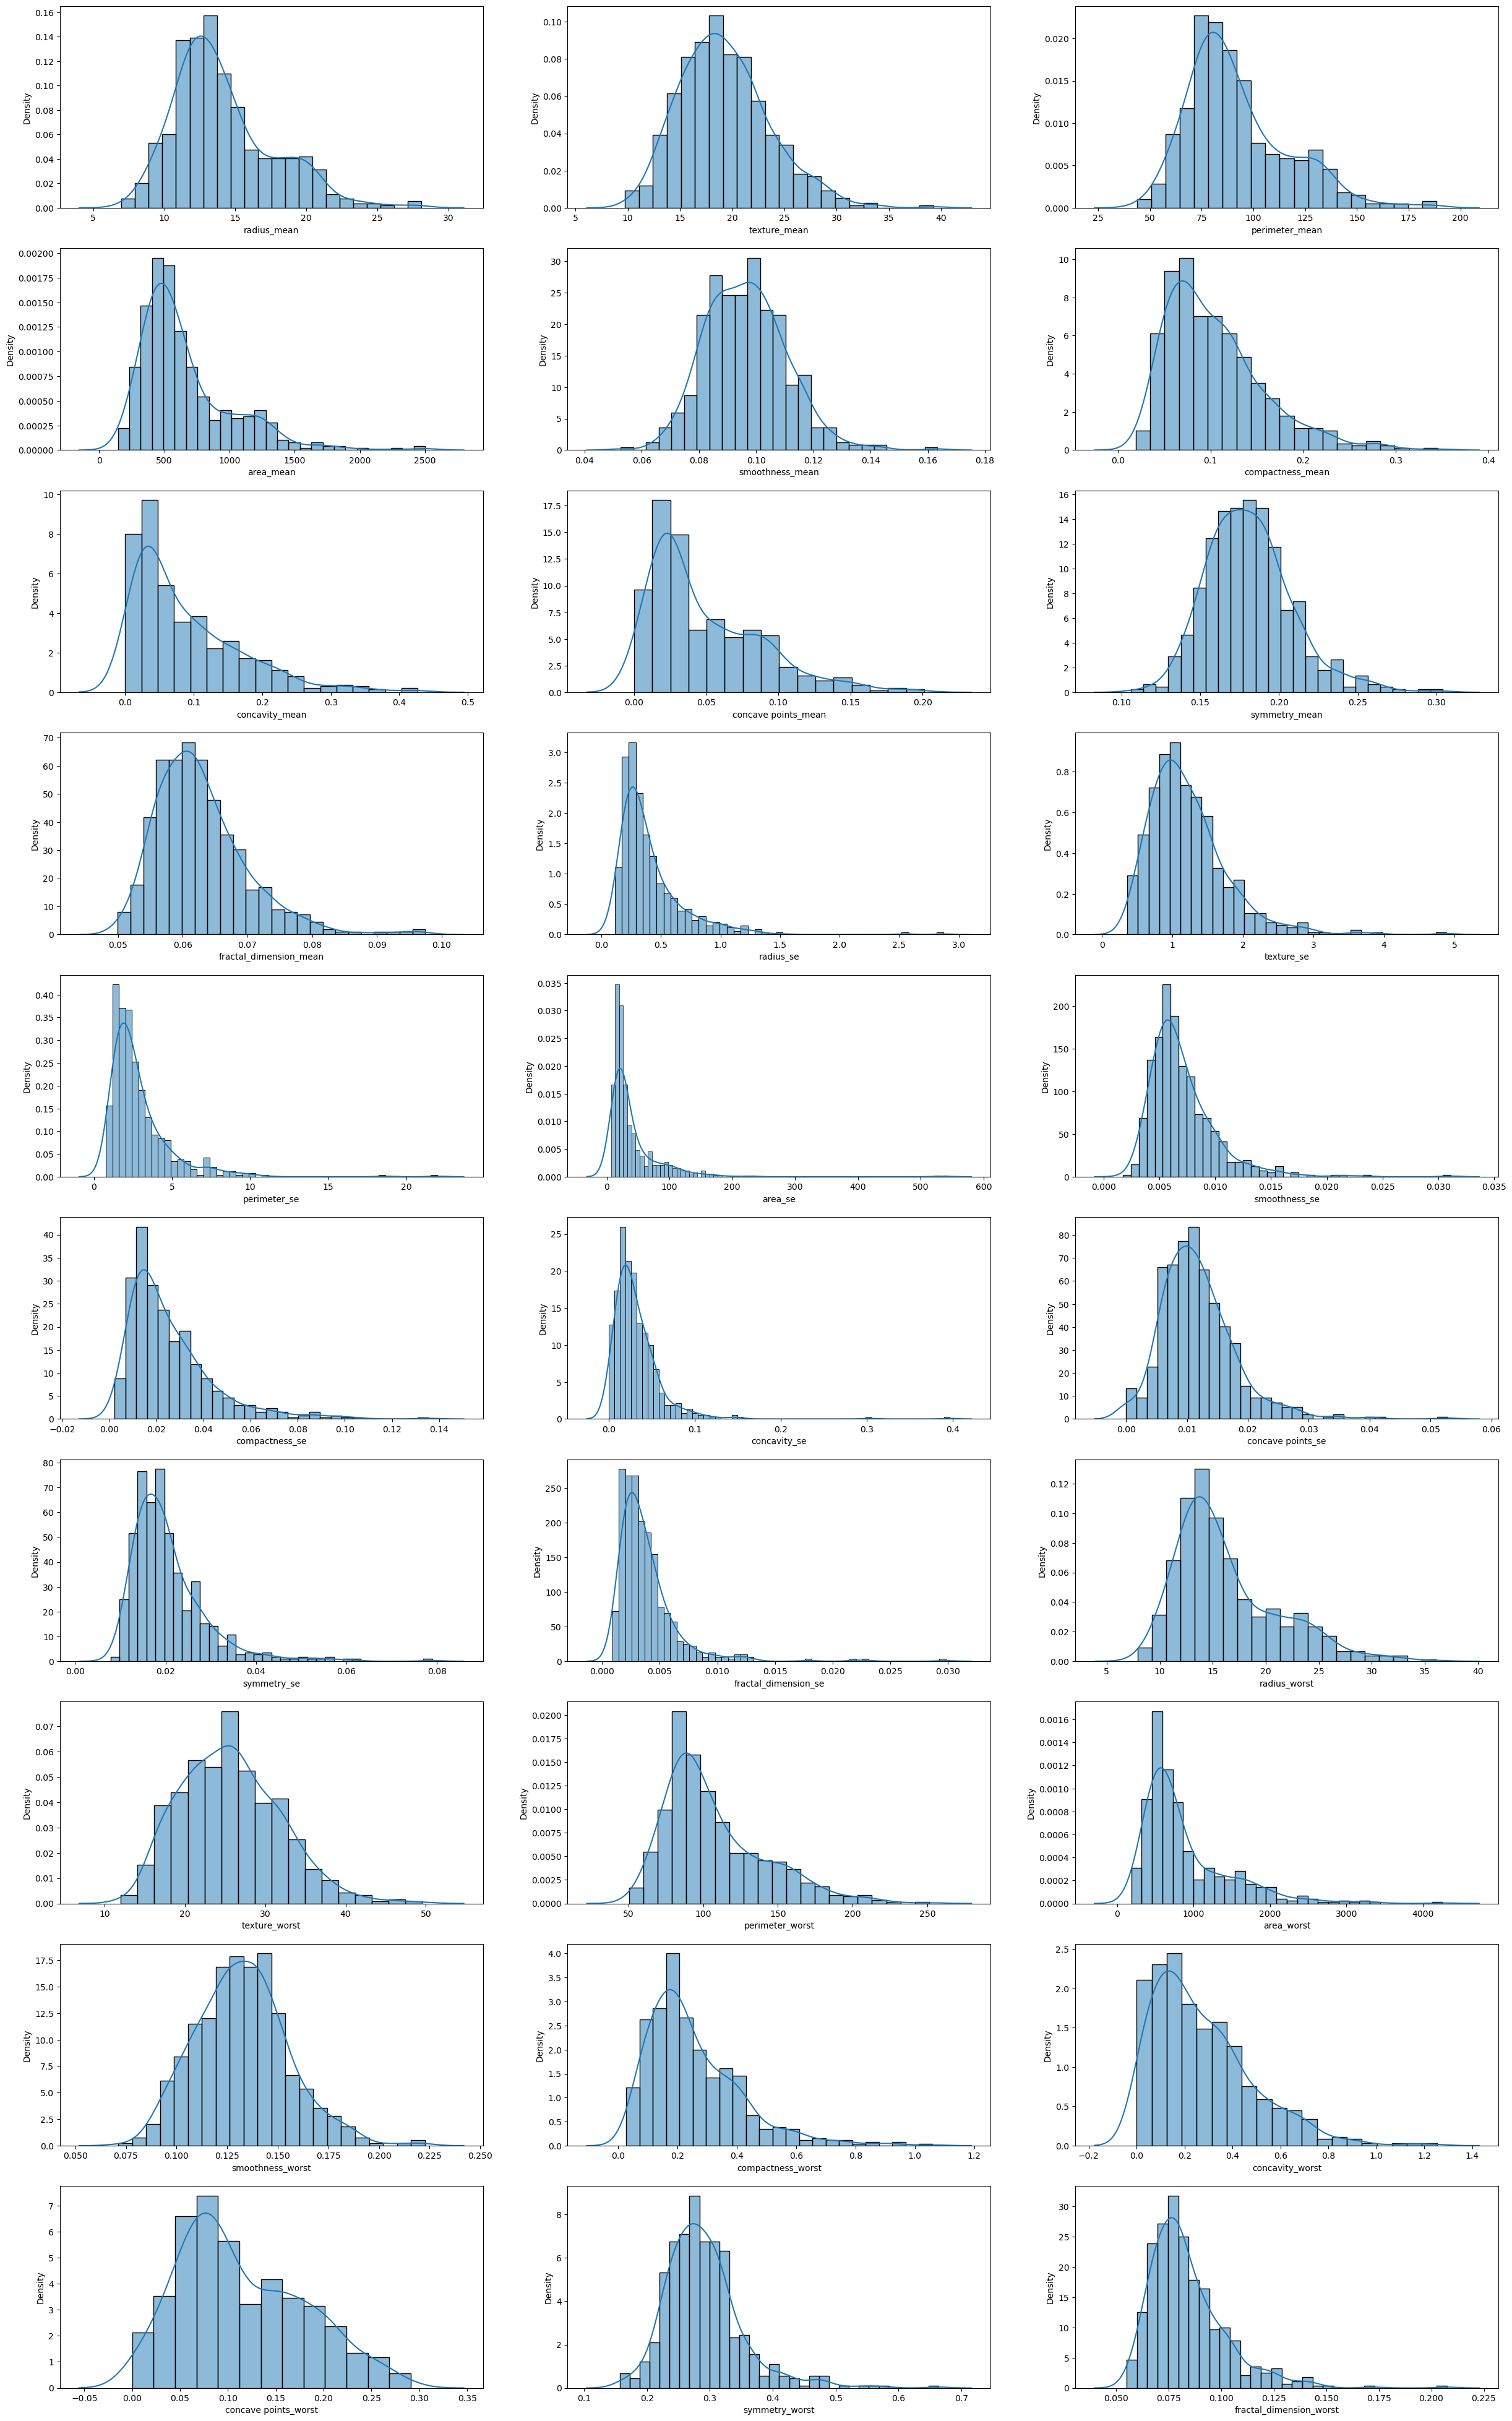

In [13]:
# Plotting distributions of numerical features
plt.figure(figsize = (30, 50))

for i, col in enumerate(num_, 1):
    plt.subplot(10, 3, i)
    sns.histplot(df[col], kde = True, stat = "density", kde_kws = dict(cut = 3))
     

C:\Users\d\AppData\Local\Temp\ipykernel_18992\3599682749.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, vmax = 1, vmin = -1)


<Axes: >

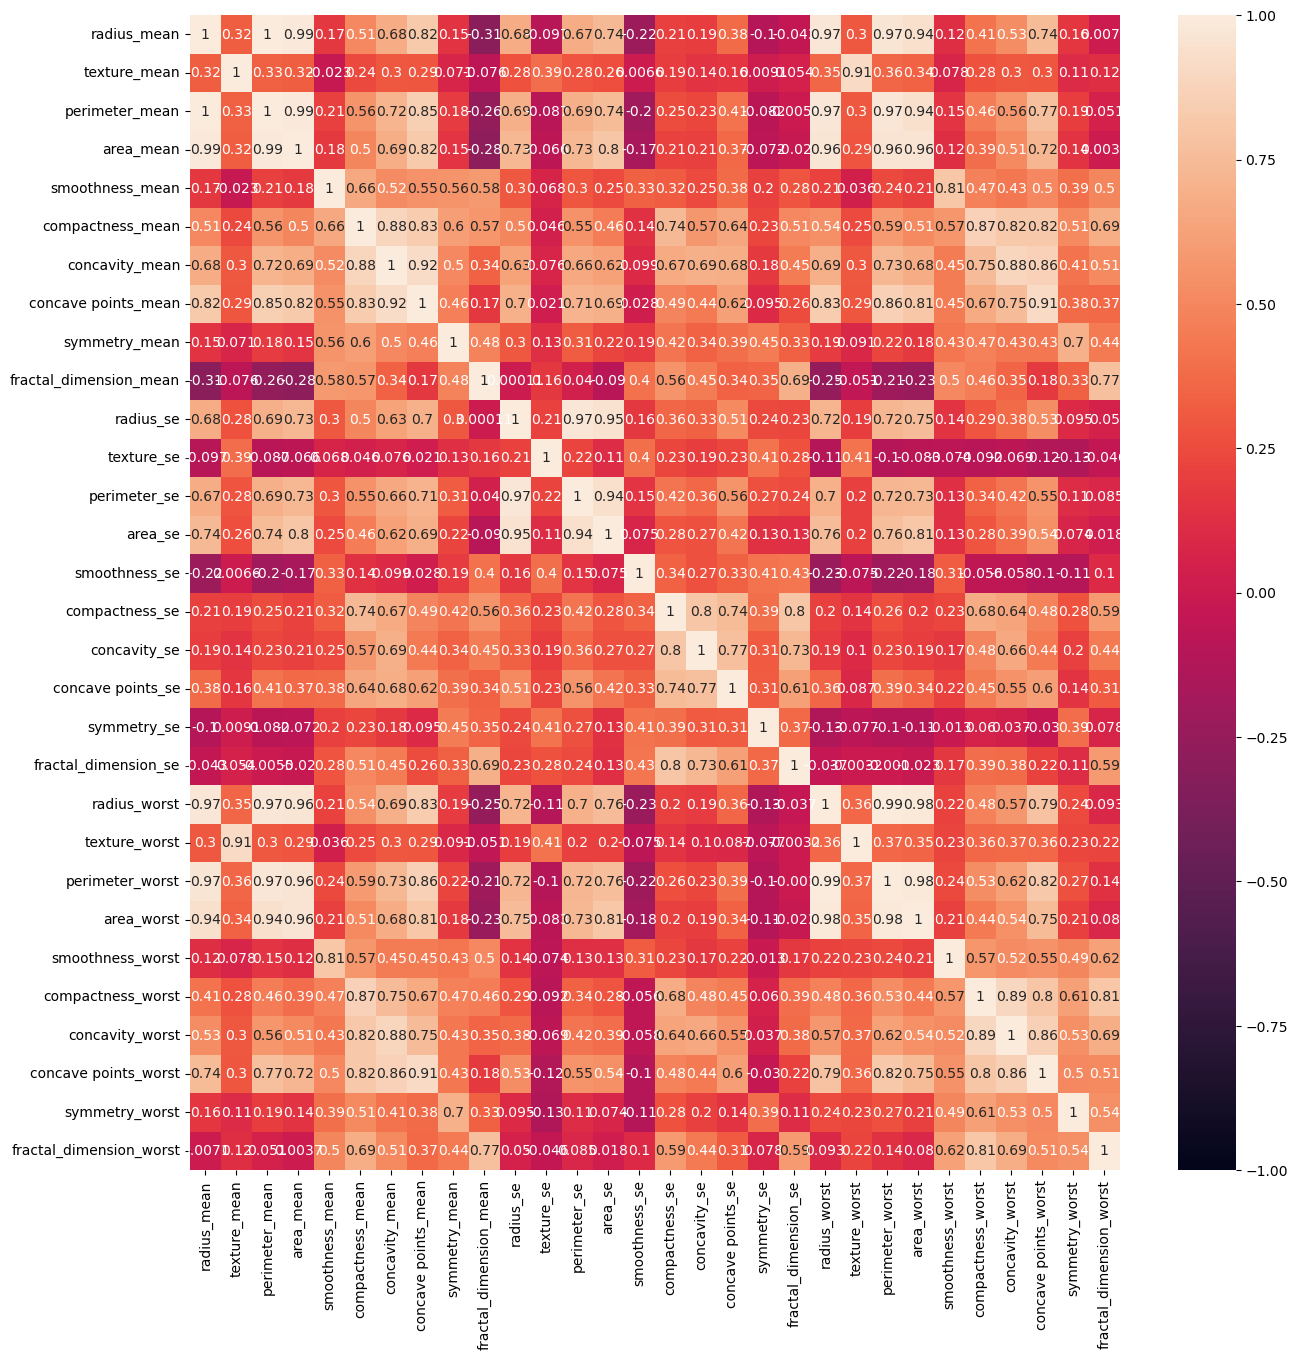

In [14]:
# Correlation heatmap
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True, vmax = 1, vmin = -1)

In [15]:
# Finding correlated features
def correlation(dataset, threshold):
  # Set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
              # Getting the name of column
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
     

In [16]:
# We are setting threshold as 0.8
correlated = correlation(df, 0.8)
print('Features showing multicollinearity : ')
correlated

Features showing multicollinearity : 


C:\Users\d\AppData\Local\Temp\ipykernel_18992\2495119663.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [17]:
# Removig columns with multicollinearity
df = df.drop(correlated, axis = 1)
df.shape

(569, 14)

Encoding categorical variable

In [18]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [19]:
# one-hot encoding
df['diagnosis'] = pd.get_dummies(df.diagnosis, drop_first = True)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.01587,0.03003,0.4601
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01340,0.01389,0.2750
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02058,0.02250,0.3613
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.01867,0.05963,0.6638
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01885,0.01756,0.2364


In diagnosis column:

1 represents Malignant

0 represents Benign

In [20]:
df.tail()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.256,0.010300,0.02891,0.02454,0.01114,0.2060
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.463,0.005769,0.02423,0.01678,0.01898,0.2572
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.075,0.005903,0.03731,0.01557,0.01318,0.2218
567,1,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.595,0.006522,0.06158,0.01664,0.02324,0.4087
568,0,7.76,24.54,0.05263,0.04362,0.1587,0.05884,0.3857,1.428,0.007189,0.00466,0.00000,0.02676,0.2871


In [21]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

# Train Data-Test Data split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 42)

In [23]:
x_train.shape, x_test.shape

((455, 13), (114, 13))

In [24]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=  StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
x_train

array([[-1.44075296, -0.43531947,  0.78057331, ...,  3.39198733,
         2.62116574,  2.09724217],
       [ 1.97409619,  1.73302577,  1.319843  , ...,  0.60059598,
        -0.31771686,  1.89116053],
       [-1.39998202, -1.24962228, -1.33264483, ...,  0.58946222,
         2.61504052,  0.59760192],
       ...,
       [ 0.04880192, -0.55500086, -2.26162674, ..., -1.31790901,
        -0.63867862, -0.70863864],
       [-0.03896885,  0.10207345,  0.73743174, ..., -0.37010838,
        -1.02211765,  0.43432185],
       [-0.54860557,  0.31327591, -1.12268916, ..., -0.81068696,
        -0.74770761, -0.3345212 ]])

### Building a Machine Learning Model

# 1.Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=5)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=5)

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
# prediction for test data
y_pred=logreg.predict(x_test)
# Evaluating the model
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

### Model Evaluation

In [28]:
# storing evalution matrics to a data freame
results= pd.DataFrame([['Logistic Regression',acc,pre,rec,f1]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])
results

,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.95614,0.952381,0.930233,0.941176


In [29]:
# Printing confusion matrix
confusion_matrix(y_test,y_pred)

array([[69,  2],
       [ 3, 40]], dtype=int64)

### Cross validation

In [30]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=logreg,X=x_train,y=y_train,cv=10)
print('Accuracy is{:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation is{:.2f}%'.format(accuracies.std()*100))

Accuracy is95.59%
Standard Deviation is3.15%


## 2.Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
ranforest=RandomForestClassifier(random_state=5)
ranforest.fit(x_train,y_train)

RandomForestClassifier(random_state=5)

In [32]:
#Model prediction with test data
y_pred=ranforest.predict(x_test)

In [33]:
# model evaluation
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [34]:
# storing evalution matrics to a data freame
rf_results= pd.DataFrame([['Random Forest Classifier',acc,pre,rec,f1]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])
results=results.append(rf_results,ignore_index=True)
results

C:\Users\d\AppData\Local\Temp\ipykernel_18992\3311031183.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(rf_results,ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.956140,0.952381,0.930233,0.941176
1,Random Forest Classifier,0.929825,0.906977,0.906977,0.906977


In [35]:
# Printing confusion matrix
confusion_matrix(y_test,y_pred)

array([[67,  4],
       [ 4, 39]], dtype=int64)

## Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=ranforest,X=x_train,y=y_train,cv=10)
print('Accuracy is{:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation is{:.2f}%'.format(accuracies.std()*100))

Accuracy is95.37%
Standard Deviation is2.88%


1.Random forest has lower accuracy and higher standard deviation.

2.Since Logistic regression has better performance we will take it as the final model and tune it for better performance

### Hyperparameter Tuning

In [37]:
#specifying different hyperparameters for random search cross validation
from sklearn.model_selection import RandomizedSearchCV
params={'penalty':['l1','l2','elasticnet','none'],'C':[0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2],
       'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

In [38]:
random_search=RandomizedSearchCV(estimator=logreg,param_distributions=params,cv=10,n_jobs=-1,scoring='roc_auc',verbose=3,random_state=5)
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\d\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\d\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\d\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\d\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver l

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=5),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25,
                                              1.5, 1.75, 2],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=5, scoring='roc_auc', verbose=3)

In [39]:
#Finding the best estimator
random_search.best_estimator_

LogisticRegression(C=0.75, penalty='l1', random_state=5, solver='liblinear')

In [40]:
#Finding best score
random_search.best_score_

0.9940089829035064

In [41]:
# Finding best params
random_search.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.75}

### Final model

In [42]:
# Training the model with best hyperparameter
classifier=LogisticRegression(solver='liblinear',penalty='l1',C=0.75)
classifier.fit(x_train,y_train)

LogisticRegression(C=0.75, penalty='l1', solver='liblinear')

In [43]:
# Making prediction with test data
y_pred=classifier.predict(x_test)

### Model Evaluation

In [44]:
#Calculating evaluation metrics
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [45]:
# storing evalution matrics to a data freame
lg_results= pd.DataFrame([['Tuned Logistic Regression',acc,pre,rec,f1]],
                     columns=['Model','Accuracy','Precision','Recall','F1 score'])
results=results.append(lg_results,ignore_index=True)
results

C:\Users\d\AppData\Local\Temp\ipykernel_18992\740822317.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(lg_results,ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 score
0,Logistic Regression,0.956140,0.952381,0.930233,0.941176
1,Random Forest Classifier,0.929825,0.906977,0.906977,0.906977
2,Tuned Logistic Regression,0.956140,0.952381,0.930233,0.941176


In [46]:
# Printing confusion Matrix
confusion_matrix(y_test,y_pred)

array([[69,  2],
       [ 3, 40]], dtype=int64)

### Making a sample prediction

radius_mean=11.13

texture_mean=16.62

smoothness_mean=0.08151

compactness_mean=0.03834

symmetry_mean=0.1511

fractal_dimension_mean=0.06148

radius_se=0.1415

texture_se=0.9671

smothness_se=0.005883

compactness_se=0.006263

concave_points_se=0.006189

symmetry_se=0.02009

symmetry_worst=0.2383



	



In [47]:
sample_obs=[11.13,16.62,0.08151,0.03834,0.1511,0.06148,0.1415,0.9671,0.005883,0.006263,0.006189,0.02009,0.2383]
# making prediction
classifier.predict(scaler.transform([sample_obs]))

C:\Users\d\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

1.Breast cancer with the given observations is Benign.

2.With this information the patient can get correct tratment for the disease.